# Region Simplification

These methods can be used to simplify regions as a preprocessing step before they are fed to labeled region scanning methods. 

In [1]:
import shapefile
import pyscan
import matplotlib.pyplot as plt


def plot_points(ax, pts, c):
    xs = []
    ys = []
    for pt in pts:
        xs.append(pt[0] )
        ys.append(pt[1])
    ax.scatter(xs, ys, color=c)

def plot_points_traj(ax, pts, c):
    xs = []
    ys = []
    for pt in pts:
        xs.append(pt[0])
        ys.append(pt[1])
    ax.plot(xs, ys, color=c)
    
def plot_approx(ax, traj_pts, core_set_pts):
#     ax.set_xlim([-.01, 1.01])
#     ax.set_ylim([-.01, 1.01])
    plot_points_traj(ax, traj_pts, "g")
    plot_points(ax, core_set_pts, "b")
    ax.set_axis_off()

shape = shapefile.Reader("county_shapes/cb_2017_us_county_500k.shp")
#first feature of the shapefile

#feature = shape.shapeRecords()[0]
pts1 = shape.shapes()[0].points
pts = [pyscan.Point(p[0], p[1], 1.0) for p in pts1]

alpha = .02
r_min = .05


## Halfplane Compression
These methods provide guarantees on regions with respect to halfplanes.

### Convex Hull
This method takes the convex hull of the trajectory. Since points internal to the convex hull will not effect halfplane labeled scanning we can do this as a preprocessing step to speed up the scanning without effecting the spatial error.

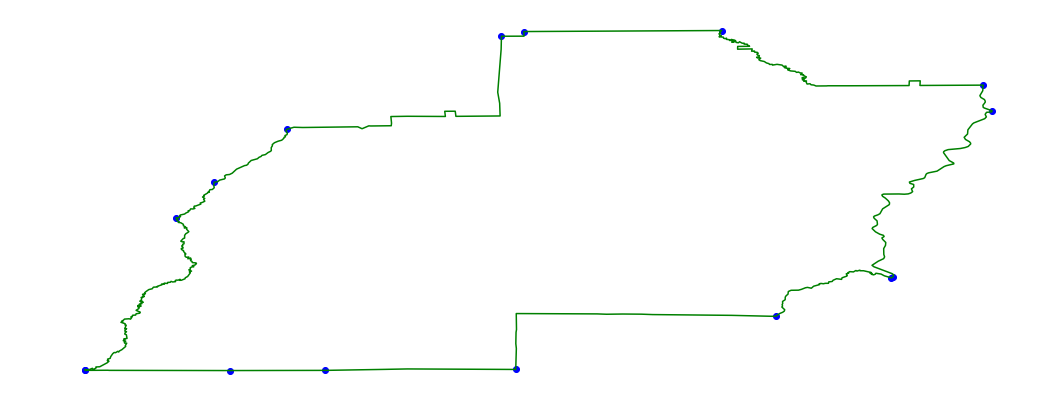

In [2]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.hull(pts)
plot_approx(ax, pts, core_set_pts)
plt.show()

### Directional Hull

This method uses an approximation of the convex hull to simplify the region even more. The spatial error is bounded by alpha. In practice this method can reduce the number of points needed significantly over just taking the convex hull, and therefore speed up halplane labeled scanning even more than the previous method.


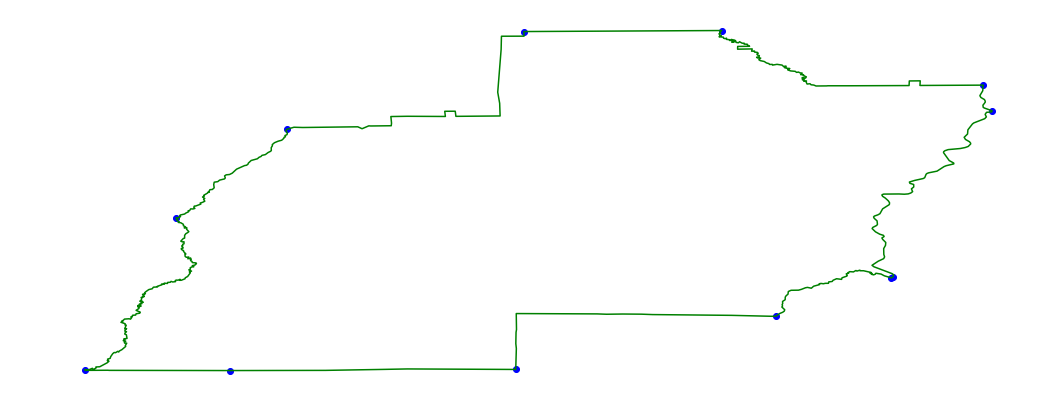

In [3]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.halfplane_kernel(pts, alpha)
plot_approx(ax, pts, core_set_pts)
plt.show()

### DP Simplification
This is the popular Douglas Peucker simplification algorithm. It has the same error guarantees as the Directional Hull method, but usually produces a larger number of points per region.

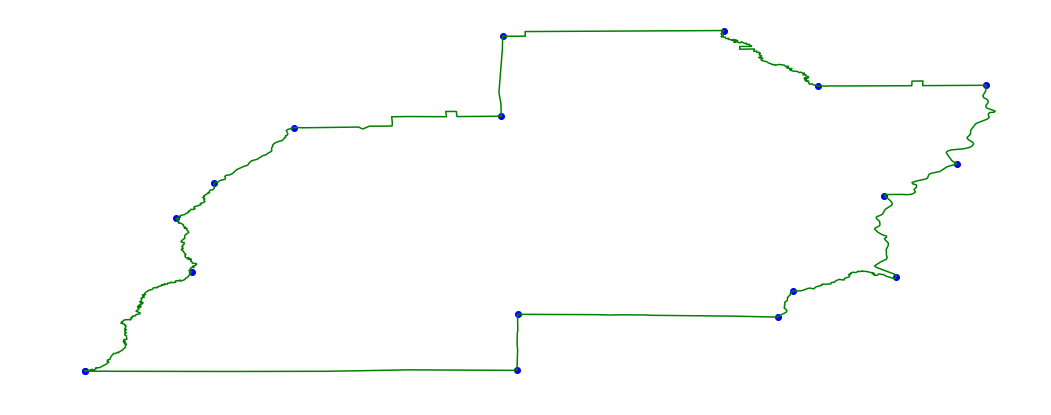

In [4]:
f, ax = plt.subplots(figsize=(18, 7))
core_set_pts = pyscan.dp_compress(pts, alpha)
plot_approx(ax, pts, core_set_pts)
plt.show()

## Disk(or Rectangle) Compression
For disk or rectangle regions we have to handle the inside of the region. We need a guarantee that any disk or rectangle of a certain minimum size contained completely inside the region will be hit. We then handle the boundaries of the region differently then the insides to get the correct guarantees for certain regions. 

### Gridding

We can apply a grid inside of the region.

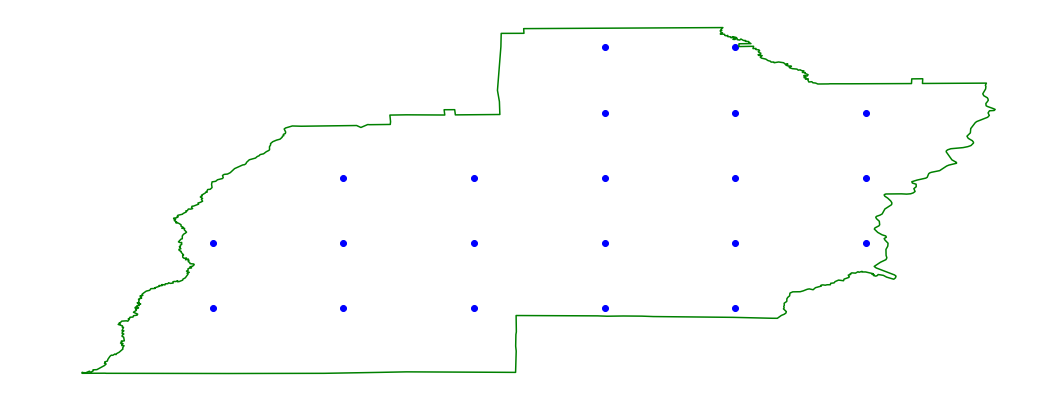

In [5]:
core_set_pts = pyscan.polygon_grid(pts, r_min * 2)
f, ax = plt.subplots(figsize=(18, 7))
plot_approx(ax, pts, core_set_pts)
plt.show()

### Boundary Conditions

Below we show a couple of different boundary methods. We recommend using the grid even for rectangles and grid_hull version for disks. Even chooses points at even spaced intervals along the region boundary. Grid hull grids the boundary of the region using a different resolutions based on the $\alpha$ parameter and then applies a directional hull aproximation internally. The r_min parameter is the minimum radius of the disk that we get $\alpha$ error on.  

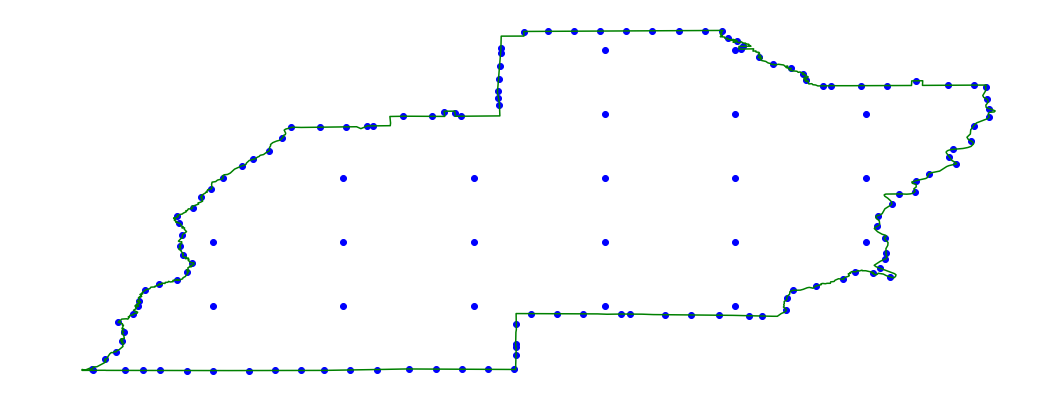

In [6]:
core_set_pts = pyscan.polygon_grid_even(pts, r_min * 2, alpha)
f, ax = plt.subplots(figsize=(18, 7))
plot_approx(ax, pts, core_set_pts)
plt.show()

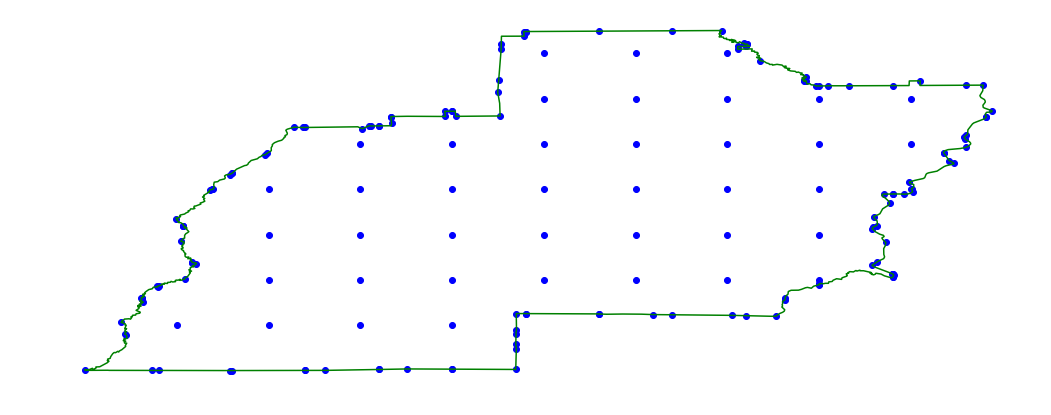

In [7]:
core_set_pts = pyscan.polygon_grid_hull(pts, r_min, alpha)
f, ax = plt.subplots(figsize=(18, 7))
plot_approx(ax, pts, core_set_pts)
plt.show()